In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='font/Times-Roman.ttf')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [9]:
# shanghai
# path = "../data/City_1/clean_5_City_1/"
# itemid = pd.read_csv(path+"itemID.txt",sep="\n",header=None)
# category = pd.read_csv(path+"category.txt",sep="\n",header=None)
# concepts = pd.read_csv(path+"concepts.txt",sep="\n",header=None)
# label =  pd.read_csv(path+"label.txt",sep="\n",header=None)
# frame = [itemid,category, label]
# data = pd.concat(frame,axis = 1)
# data.columns=['itemid','concepts','label']
# data = data.drop_duplicates()
# df = data.groupby(by=['label'])
# df
# df0 = df.get_group(0)
# df1 = df.get_group(1)

In [10]:
def dictionairy(key_value):  
  
    # 声明字典
#     key_value ={}     
 
#     # 初始化
#     key_value[2] = 56       
#     key_value[1] = 2 
#     key_value[5] = 12 
#     key_value[4] = 24
#     key_value[6] = 18      
#     key_value[3] = 323 
 
    dicta ={}
 
    # sorted(key_value) 返回重新排序的列表
    # 字典按键排序
    for i in sorted (key_value) : 
        dicta[i] = key_value[i]
    return dicta

In [11]:
# path = "/home/lx/DianPing Analysis/data/clean/city_1/"
# data = pd.read_csv(path+"city1_clean.txt",sep="\t")
def get_XY(city):
    label = pd.read_csv("/home/lx/CAML_Work/restaurant/restaurant_info/data/businesses_label.txt",sep="\t",header=None)
    category = pd.read_csv("/home/lx/DianPing Analysis/data/clean/businesses_style.txt",sep="\t",header=None)
    label.columns =['itemid','A','City','C','D','E','F','G','H','category','label']
    category.columns=['itemid','category']
    if city != 0:
        label = label[label['City']==city]
    label=label[['itemid','label']]
    dff = pd.merge(label,category,how='inner',on='itemid')

    # 分组
    df = dff.groupby(by=['label'])
    df0 = df.get_group(0)
    df1 = df.get_group(1)

    dicta = {}
    for k, v in dff['category'].value_counts().items():
        dicta[k] = v
        #         dicta.append([k,v])
#     dicta = np.array(dicta)
#     dicta = dicta[np.lexsort(dicta[:,::-1].T)]
#     dicta=dict(dicta)

    dict0 = {}
    for k, v in df0['category'].value_counts().items():
        dict0[k] = v
        #         dict0.append([k,v])
#     dict0 = np.array(dict0)
#     dict0 = dict0[np.lexsort(dict0[:,::-1].T)]
#     dict0=dict(dict0)
    dicta = dictionairy(dicta)
    dict0 = dictionairy(dict0)
    X = []
    Y = []
    dict0
    for k,v in dicta.items():
        if k in dict0:
            X.append(k)
            Y.append(dict0[k]/v)
        else :
            X.append(k)
            Y.append(0)
    
#     print(dicta)
#     print(dict0)
#     print(X0)
#     print(Y0)
    return X, Y


In [12]:
X0, Y0 = get_XY(0)
X1, Y1 = get_XY(1)
X2, Y2 = get_XY(2)
X4, Y4 = get_XY(4)

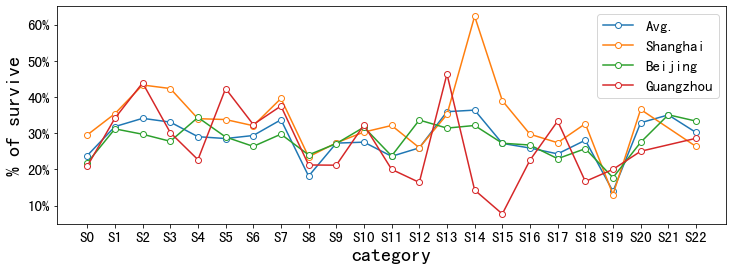

In [17]:
plt.figure(figsize=(12,4))
X0 = ['S0','S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','S12','S13','S14','S15','S16','S17','S18','S19','S20','S21','S22']
plt.plot(X0, Y0, marker='o',mfc='w',label="Avg.")
plt.plot(X1, Y1, marker='o',mfc='w',label="Shanghai")
plt.plot(X2, Y2, marker='o',mfc='w',label="Beijing")
plt.plot(X4, Y4, marker='o',mfc='w',label="Guangzhou")
plt.xlabel('category',fontsize=20)
plt.ylabel('% of survive',fontsize=20)

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.legend(fontsize=15)

plt.savefig("figure/dianping_category.png",dpi=600)
plt.show()

In [14]:
### Yelp
#### 
